In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from src.config import DADOS_ORIGINAIS, DADOS_TRATADOS

sns.set_theme(palette='bright')

In [2]:
# Importação da base de dados
df = pd.read_csv(DADOS_ORIGINAIS)
df.head(3)

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,poisonous
0,x,s,n,t,p,f,c,n,k,e,...,w,w,p,w,o,p,k,s,u,p
1,x,s,y,t,a,f,c,b,k,e,...,w,w,p,w,o,p,n,n,g,e
2,b,s,w,t,l,f,c,b,n,e,...,w,w,p,w,o,p,n,n,m,e


In [3]:
# Visualização de colunas com valores nulos
for col in df.columns:
    nulls = df[col].isnull().sum()
    if nulls:
        print(f"{col}: {nulls}")

stalk-root: 2480


In [4]:
# Informações da base de dados
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   cap-shape                 8124 non-null   object
 1   cap-surface               8124 non-null   object
 2   cap-color                 8124 non-null   object
 3   bruises                   8124 non-null   object
 4   odor                      8124 non-null   object
 5   gill-attachment           8124 non-null   object
 6   gill-spacing              8124 non-null   object
 7   gill-size                 8124 non-null   object
 8   gill-color                8124 non-null   object
 9   stalk-shape               8124 non-null   object
 10  stalk-root                5644 non-null   object
 11  stalk-surface-above-ring  8124 non-null   object
 12  stalk-surface-below-ring  8124 non-null   object
 13  stalk-color-above-ring    8124 non-null   object
 14  stalk-color-below-ring  

In [5]:
# Descrição estatística dos dados
df.describe()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,poisonous
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,6,4,10,2,9,2,2,2,12,2,...,9,9,1,4,3,5,9,6,7,2
top,x,y,n,f,n,f,c,b,b,t,...,w,w,p,w,o,p,w,v,d,e
freq,3656,3244,2284,4748,3528,7914,6812,5612,1728,4608,...,4464,4384,8124,7924,7488,3968,2388,4040,3148,4208


In [6]:
# Definição das variáveis preditoras e alvo
X = df.drop(columns=['poisonous'])
y = df['poisonous']

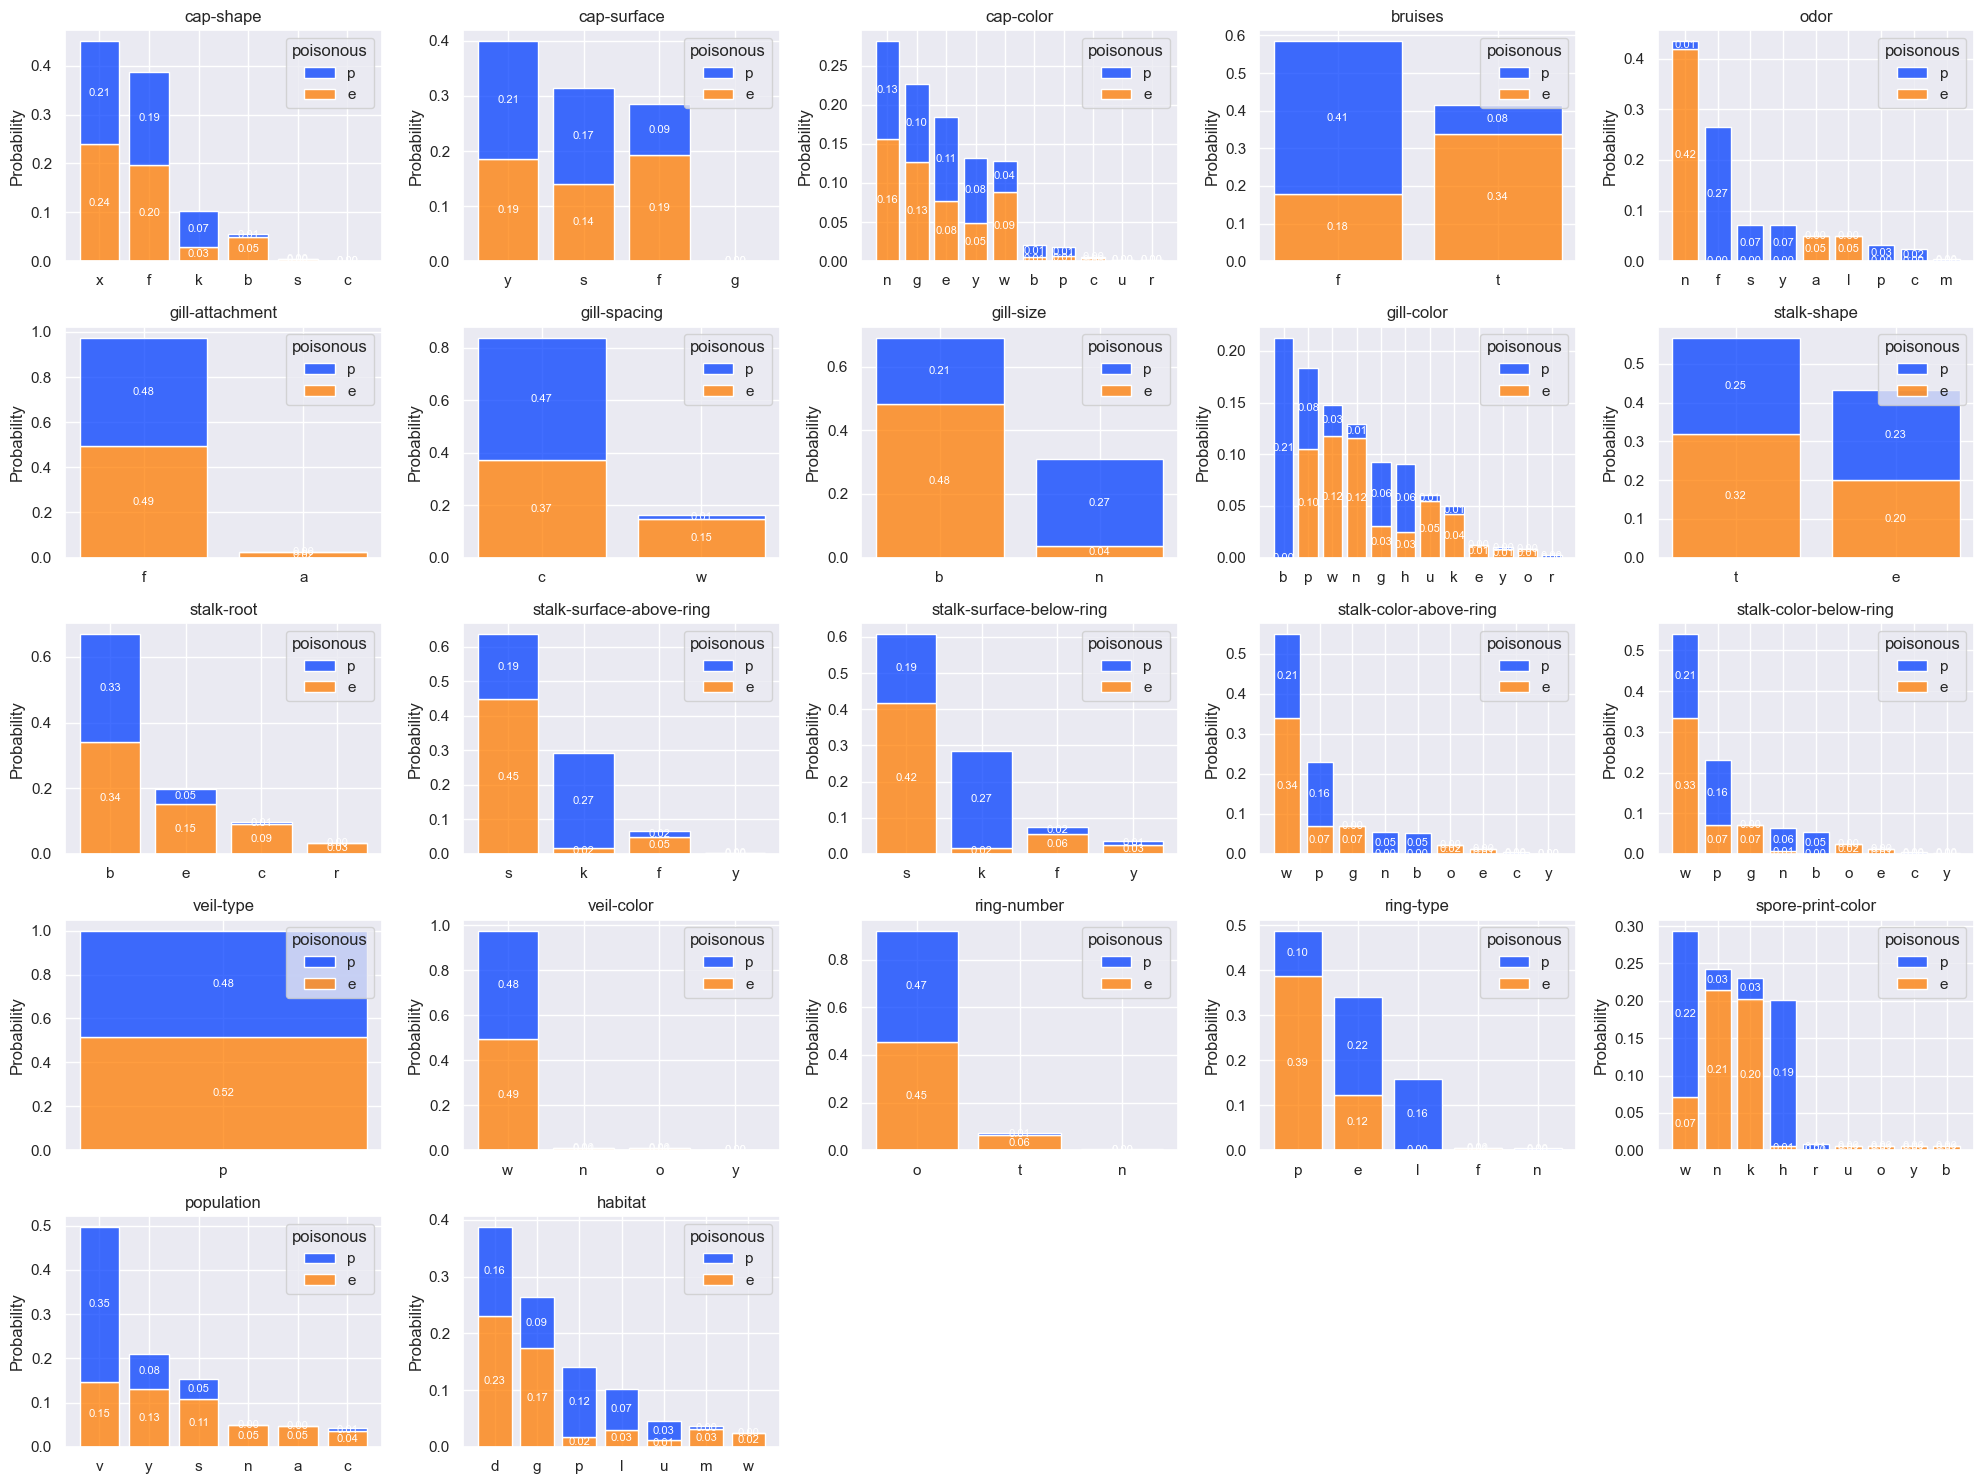

In [7]:
fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(20,15))
axes = axes.flatten()

for i, col in enumerate(X.columns):
    order = df[col].value_counts(normalize=True).sort_values(ascending=False).index
    temp_col = pd.Categorical(df[col], categories=order, ordered=True)

    # Plot o histplot com empilhamento
    ax = axes[i]
    sns.histplot(
        x=temp_col,
        hue=df['poisonous'],
        stat='probability',
        multiple='stack',
        shrink=0.8,
        ax=ax
    )
    ax.set_title(col)

    # Adicionar rótulos
    for container in ax.containers:
        ax.bar_label(container, fmt='%.2f', label_type='center', fontsize=8, color='white')

for ax in axes[-(len(axes)-len(X.columns)):]:
    ax.set_visible(False)

plt.tight_layout()
plt.show()

In [8]:
# Remoção da coluna 'stalk-root' devido a quantidade de valores nulos
df = df.drop(columns=['stalk-root'])

In [9]:
# Salvamento da base tratada
df.to_csv(DADOS_TRATADOS, index=False)